In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
FILENAME = "troop_movements.csv"

In [3]:
data =pd.read_csv('troop_movements.csv')
print(data.head())

             timestamp  unit_id    unit_type empire_or_resistance  location_x  \
0  2024-07-11 11:53:29        1       x-wing           resistance           6   
1  2024-07-11 11:53:28        2  tie_fighter           resistance           4   
2  2024-07-11 11:53:27        3        at-st           resistance           7   
3  2024-07-11 11:53:26        4        at-st               empire           1   
4  2024-07-11 11:53:25        5        at-at           resistance           7   

   location_y  destination_x  destination_y homeworld  
0          10              9              5   Vulpter  
1           1              2              1   Serenno  
2          10              7              8   Quermia  
3           7              1              7     Cerea  
4           1              8              4      Ojom  


In [4]:
emp_or_res_grouped = data.groupby('empire_or_resistance').size().reset_index(name='count')
print(emp_or_res_grouped)

  empire_or_resistance  count
0               empire    501
1           resistance    499


In [5]:
homeworld_grouped = data.groupby('homeworld').size().reset_index(name='count')
print(homeworld_grouped)

       homeworld  count
0       Alderaan     26
1    Aleen Minor     24
2     Bestine IV     23
3          Cerea     33
4       Champala     21
5      Chandrila     32
6   Concord Dawn     19
7       Corellia     18
8        Dagobah     25
9       Dathomir     31
10         Dorin     32
11        Eriadu     21
12   Glee Anselm     26
13    Haruun Kal     43
14       Iktotch     21
15      Iridonia     30
16         Kalee     23
17      Kashyyyk     19
18     Malastare     15
19        Mirial     25
20      Mon Cala     20
21    Muunilinst     29
22         Naboo     20
23          Ojom     27
24       Quermia     14
25         Rodia     19
26        Ryloth     16
27       Serenno     18
28         Shili     30
29         Skako     19
30       Socorro     23
31       Stewjon     25
32       Sullust     26
33      Tatooine     26
34       Tholoth     23
35      Toydaria     22
36     Trandosha     19
37       Troiken     15
38          Tund     30
39        Umbara     25
40       Vulpter

In [6]:
unit_type_grouped = data.groupby('unit_type').size().reset_index(name='count')
print(unit_type_grouped)

            unit_type  count
0               at-at    131
1               at-st    120
2  resistance_soldier    119
3        stormtrooper    147
4         tie_fighter    132
5        tie_silencer    102
6             unknown    111
7              x-wing    138


In [7]:
data['is_resistance'] = np.where(data['empire_or_resistance'] == 'resistance', True, False)

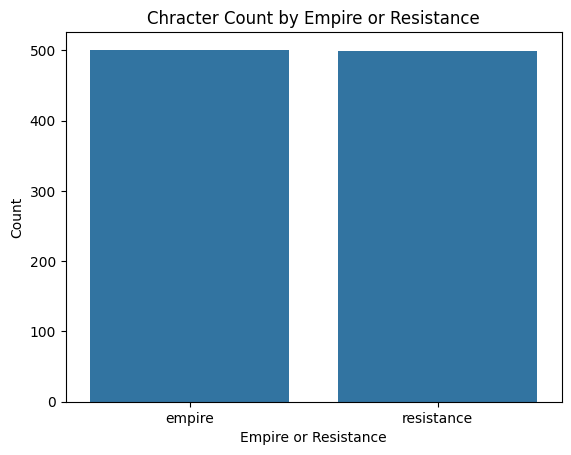

In [8]:
# Histogram
sns.barplot(x = 'empire_or_resistance',
            y = 'count',
            data = emp_or_res_grouped)
plt.title('Chracter Count by Empire or Resistance')
plt.xlabel('Empire or Resistance')
plt.ylabel('Count')
plt.show()

In [2]:
# Read 10 Million line CSV file
FILENAME_10M = "troop_movements10m.csv"
df10m = pd.read_csv(FILENAME_10M)

In [4]:
#Clean data
display(df10m)
#Replace invalid unit types with "unknown"
df10m['unit_type'] = df10m['unit_type'].apply(
    lambda type: "unknown" if type == "invalid_unit" else type
)

#Get rid of NaNs in location
cleaned_df = df10m.ffill()
display(cleaned_df)

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
0,2023-06-13 17:33:18,1,at-st,2.0,8.0,1,1,Glee Anselm
1,2023-06-13 17:33:17,2,tie_silencer,4.0,4.0,0,1,Trandosha
2,2023-06-13 17:33:16,3,at-at,0.0,3.0,6,1,Corellia
3,2023-06-13 17:33:15,4,tie_silencer,6.0,1.0,6,9,Shili
4,2023-06-13 17:33:14,5,tie_fighter,0.0,4.0,9,6,Muunilinst
...,...,...,...,...,...,...,...,...
9999995,2023-02-18 10:26:20,9999996,resistance_soldier,6.0,6.0,1,3,Troiken
9999996,2023-02-18 10:26:19,9999997,tie_silencer,8.0,6.0,2,0,Kashyyyk
9999997,2023-02-18 10:26:18,9999998,tie_fighter,7.0,7.0,6,4,Kashyyyk
9999998,2023-02-18 10:26:17,9999999,tie_fighter,6.0,6.0,8,8,Kalee


,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
0,2023-06-13 17:33:18,1,at-st,2.0,8.0,1,1,Glee Anselm
1,2023-06-13 17:33:17,2,tie_silencer,4.0,4.0,0,1,Trandosha
2,2023-06-13 17:33:16,3,at-at,0.0,3.0,6,1,Corellia
3,2023-06-13 17:33:15,4,tie_silencer,6.0,1.0,6,9,Shili
4,2023-06-13 17:33:14,5,tie_fighter,0.0,4.0,9,6,Muunilinst
...,...,...,...,...,...,...,...,...
9999995,2023-02-18 10:26:20,9999996,resistance_soldier,6.0,6.0,1,3,Troiken
9999996,2023-02-18 10:26:19,9999997,tie_silencer,8.0,6.0,2,0,Kashyyyk
9999997,2023-02-18 10:26:18,9999998,tie_fighter,7.0,7.0,6,4,Kashyyyk
9999998,2023-02-18 10:26:17,9999999,tie_fighter,6.0,6.0,8,8,Kalee


In [ ]:
# Save cleaned data to a Parquet file
cleaned_df.to_parquet('troop_movements10m.parquet', engine='pyarrow')